## Import all necessary libraries

In [1]:
import  torch
import torch.nn.functional as F
import torch.optim as optim
from model import Net
import utils

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define the device

In [2]:
device = utils.get_device()
device

device(type='cuda')

## Load train and test datasets and data loaders

In [3]:
train_data = utils.load_dataset(train=True)
test_data = utils.load_dataset(train=False)

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

## Display images in first batch

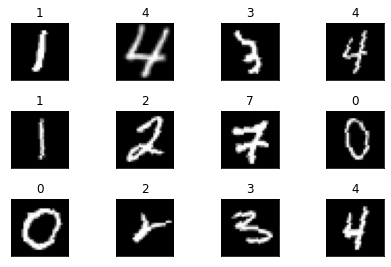

In [5]:
utils.diplay_batch(train_loader)

## Create the Network

In [6]:
model = Net()

In [7]:
!pip install torchsummary
from torchsummary import summary
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


## Define optimizer, scheduler and criterion

In [8]:
model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = F.nll_loss

Adjusting learning rate of group 0 to 1.0000e-02.


## Train the network

In [9]:
train_losses, train_acc, test_losses, test_acc = utils.train_model(model, device, train_loader, test_loader, criterion, optimizer, scheduler, epoch=20)

Epoch 1


Train: Loss=0.4490 Batch_id=117 Accuracy=42.55: 100% 118/118 [00:06<00:00, 17.99it/s]


Test set: Average loss: 0.3316, Accuracy: 8997/10000 (89.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0996 Batch_id=117 Accuracy=93.26: 100% 118/118 [00:06<00:00, 17.69it/s]


Test set: Average loss: 0.0955, Accuracy: 9696/10000 (96.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1325 Batch_id=117 Accuracy=96.27: 100% 118/118 [00:06<00:00, 17.43it/s]


Test set: Average loss: 0.0574, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1394 Batch_id=117 Accuracy=97.07: 100% 118/118 [00:06<00:00, 17.63it/s]


Test set: Average loss: 0.0529, Accuracy: 9831/10000 (98.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1466 Batch_id=117 Accuracy=97.58: 100% 118/118 [00:06<00:00, 17.30it/s]


Test set: Average loss: 0.0387, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0864 Batch_id=117 Accuracy=97.88: 100% 118/118 [00:06<00:00, 17.00it/s]


Test set: Average loss: 0.0367, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0502 Batch_id=117 Accuracy=98.09: 100% 118/118 [00:06<00:00, 17.64it/s]


Test set: Average loss: 0.0339, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0380 Batch_id=117 Accuracy=98.24: 100% 118/118 [00:06<00:00, 16.97it/s]


Test set: Average loss: 0.0361, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0149 Batch_id=117 Accuracy=98.39: 100% 118/118 [00:06<00:00, 17.67it/s]


Test set: Average loss: 0.0344, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0165 Batch_id=117 Accuracy=98.46: 100% 118/118 [00:06<00:00, 17.41it/s]


Test set: Average loss: 0.0284, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0117 Batch_id=117 Accuracy=98.57: 100% 118/118 [00:06<00:00, 17.03it/s]


Test set: Average loss: 0.0270, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0498 Batch_id=117 Accuracy=98.75: 100% 118/118 [00:06<00:00, 17.61it/s]


Test set: Average loss: 0.0273, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0555 Batch_id=117 Accuracy=98.65: 100% 118/118 [00:06<00:00, 17.23it/s]


Test set: Average loss: 0.0369, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0066 Batch_id=117 Accuracy=98.78: 100% 118/118 [00:07<00:00, 16.77it/s]


Test set: Average loss: 0.0247, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0122 Batch_id=117 Accuracy=98.91: 100% 118/118 [00:06<00:00, 17.66it/s]


Test set: Average loss: 0.0350, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0080 Batch_id=117 Accuracy=99.08: 100% 118/118 [00:06<00:00, 17.87it/s]


Test set: Average loss: 0.0208, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0078 Batch_id=117 Accuracy=99.17: 100% 118/118 [00:06<00:00, 17.75it/s]


Test set: Average loss: 0.0205, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0957 Batch_id=117 Accuracy=99.17: 100% 118/118 [00:06<00:00, 17.87it/s]


Test set: Average loss: 0.0204, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0189 Batch_id=117 Accuracy=99.19: 100% 118/118 [00:06<00:00, 17.48it/s]


Test set: Average loss: 0.0212, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0383 Batch_id=117 Accuracy=99.18: 100% 118/118 [00:06<00:00, 17.70it/s]


Test set: Average loss: 0.0205, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Plot metrics for the network

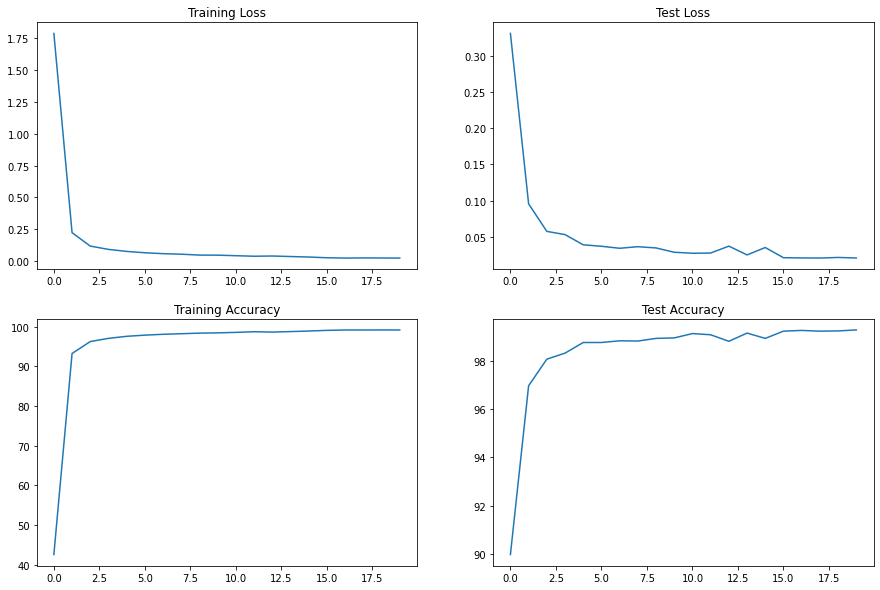

In [10]:
utils.plot_model_metrics(train_losses, train_acc, test_losses, test_acc)